# Introduction to Natural Language Processing

**Objectives**:

- Understand Basic Text Wrangling and Organizing Strategies
- Use `textblob` and `Vader` to examine the sentiment of texts
- Understand the Bag Of Words representation of Text
- Use `scikitlearn` to Vectorize text
- Build Classification Models using `scikitlearn`

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay

### Expected Value of Classifier

Last class, we explored further evaluation metrics for classification models.  One last idea is if we have costs associated with each outcome.  In the example of cell phone churn, perhaps we market an incentive to customers we think will churn.

If a consumer buys the product for \\$200, our product related costs are \\$200.  Our cost is \\$1 for marketing materials, so we get a profit of \\$99.  



In [ ]:
#cost - benefit matrix
#same orientation as confusion matrix

In [35]:
churn = fetch_openml(data_id = 40701).frame
churn.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [38]:
X = churn.select_dtypes(include = ['float', 'int'])
y = churn['class']

In [39]:
lgr = LogisticRegression().fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


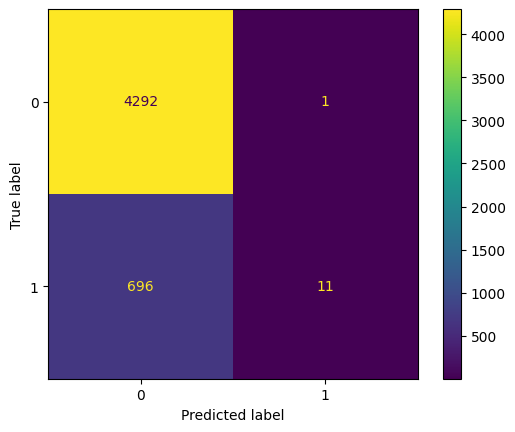

In [41]:
ConfusionMatrixDisplay.from_estimator(lgr, X, y)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y, lgr.predict(X))

array([[4292,    1],
       [ 696,   11]])

In [ ]:
#turn confusion matrix into probabilities


In [ ]:
#multiply by cost-benefit


In [ ]:
#expected value?


### Classification with Text Input

In [6]:
# !pip install vaderSentiment
# !pip install textblob

In [44]:
laptops = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/bootcamp_spr25/refs/heads/main/data/laptops_dataset_final_600.csv')
laptops.head()

HTTPError: HTTP Error 404: Not Found

### Sentiment Analysis

- [textblob](https://textblob.readthedocs.io/en/dev/): Uses a model trained on movie reviews to learn the sentiment and polarity of a text.

- [Vader Sentiment](https://github.com/cjhutto/vaderSentiment): Finer grained and incorporates idea of *valence* in assigning sentiment assessment.  
> Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [8]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
#instantiate our sentiment analyzer
vsent = SentimentIntensityAnalyzer()

In [10]:
#score a random review
vsent.polarity_scores(laptops['review'][10])

{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.9059}

In [11]:
print(laptops['review'][10])

Great laptop. Very good performance, battery life and look and feel. Very happy with my purchase


In [ ]:
#score a different review


In [ ]:
#examine the second review -- does this look correct?


In [12]:
#Create a TextBlob object
blob = TextBlob(laptops['review'][10])

In [14]:
#Look at sentiment
blob.sentiment

Sentiment(polarity=0.9033333333333333, subjectivity=0.8433333333333334)

In [15]:
#Look at polarity
blob.polarity

0.9033333333333333

In [16]:
#Look at subjectivity
blob.subjectivity

0.8433333333333334

### Problem

1. Write a function to map the Vader analyzer to columns in your dataframe.  You want new columns for each of the scores: `neg, neu, pos, compound`.

2. Examine the reviews with the highest positive scores, do things look correct?

3. Examine the review with the highest negative scores, does this look right?

### Building a Classifier

> *The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.* -- Wikipedia

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#instantiate the CountVectorizer


In [ ]:
#Transform the text


In [ ]:
#What are we working with here?


In [ ]:
#make it a dataframe


In [ ]:
#examine


In [ ]:
#Find the Most Frequently Occurring Words


### Stopwords

In [ ]:
#another instance of count vectorizer


In [ ]:
#fit it


In [ ]:
#examine the words again


In [ ]:
#how about general shape


### Limiting Features

In [ ]:
#limit features to 50 with stopwords removed


In [ ]:
#Fit and transform


### Building a Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#instantiate regressor 
clf = LogisticRegression()

In [ ]:
#x and y based on y > 3 in ratings


In [ ]:
#train test split


In [ ]:
#make a pipeline


In [ ]:
#fit the pipe


In [ ]:
#score the model


In [ ]:
#look at coefs


In [ ]:
#put them in dataframe with words


In [ ]:
word_coef_df = pd.DataFrame({'coefs': word_coefs, 'word': words})

In [ ]:
#examine a plot of ten largest


In [ ]:
#ten smallest


### Lemmatizing & Stemming

- "He is *running* really fast!"
- "He *ran* the race."
- "He *runs* a five-minute mile."

If we wanted a computer to interpret these sentences, I might count up how many times I see each word. The computer will treat words like "running," "ran," and "runs" differently... but they mean very similar things (in this context)!

**Lemmatizing** and **stemming** are two forms of shortening words so we can combine similar forms of the same word.

When we "**lemmatize**" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word.

In [25]:
# Import lemmatizer. 
from nltk.stem import WordNetLemmatizer

# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [ ]:
# Lemmatize the word "computers"


In [ ]:
# Lemmatize the word "computation"


When we "**stem**" data, we take words and attempt to return a base form of the word. It tends to be cruder than using lemmatization. There's a [method developed by Porter in 1980](https://www.cs.toronto.edu/~frank/csc2501/Readings/R2_Porter/Porter-1980.pdf) that explains the algorithm used below.

In [17]:
# Import stemmer.
from nltk.stem.porter import PorterStemmer

In [18]:
# Instantiate object of class PorterStemmer.
p_stemmer = PorterStemmer()

In [32]:
p_stemmer.stem('computers')

'comput'

In [33]:
p_stemmer.stem('computing')

'comput'

### Practice

There are a couple of ways to proceed with (a better performing) sentiment analysis:

1. If you have already-labeled data, you can build a supervised learning model.
2. If you don't have labeled data, you can use a Lexicon that has already been built/trained for sentiment analysis.
    - There are a bunch of these and which to use depends on your purpose/data. Here are just a few that are available:
        - AFINN lexison
        - MPQA subjectivity lexicon
        - SentiWordNet
        - VADER lexicon

We will review the basic NLP techniques we've learned to create a sentiment analyzer from our laptop reviews.  We use only the words of the review as input and the target is the rating column.

----


1. Setup a pipeline to inject the `CountVectorizer` and a `LogisticRegression` estimator.
2. Fit and score the model with no hyperparameter adjustment.
3. Remove stopwords and limit the features to 500.  Is there a significant difference?
4. Grid Search some different versions of the `CountVectorizer` and identify the best estimator.
5. Investigate coefficients; what do they mean?  
6. What words seem most important to determining positive sentiment?  Negative?